In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = pd.read_csv('USA_Housing.csv')

# using normal arrays makes this have an accuracy of 90% instead of 70%
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
acc = model.score(x_test, y_test)
print('Accuracy: ', acc)

Accuracy:  0.9146839565339262


In [6]:
predictions = model.predict(x_test)
for x in range(len(predictions)):
    print(round(predictions[x], 2), '|', round(y[x], 2))
    print(f'Off by {round(y[x]/abs(predictions[x] - y[x]), 1)}%')

1667457.93 | 1059033.56
Off by 1.7%
1187729.95 | 1505890.91
Off by 4.7%
1487621.93 | 1058987.99
Off by 2.5%
1276319.73 | 1260616.81
Off by 80.3%
1182164.03 | 630943.49
Off by 1.1%
1847507.97 | 1068138.07
Off by 1.4%
1501008.4 | 1502055.82
Off by 1434.1%
515703.98 | 1573936.56
Off by 1.5%
915006.84 | 798869.53
Off by 6.9%
1413291.44 | 1545154.81
Off by 11.7%
1502065.96 | 1707045.72
Off by 8.3%
1228354.75 | 663732.4
Off by 1.2%
1191054.65 | 1042814.1
Off by 7.0%
1014840.03 | 1291331.52
Off by 4.7%
981306.26 | 1402818.21
Off by 3.3%
754253.27 | 1306674.66
Off by 2.4%
1413183.76 | 1556786.6
Off by 10.8%
690024.53 | 528485.25
Off by 3.3%
1255388.46 | 1019425.94
Off by 4.3%
1215632.69 | 1030591.43
Off by 5.6%
710072.24 | 2146925.34
Off by 1.5%
855372.11 | 929247.6
Off by 12.6%
1117064.43 | 718887.23
Off by 1.8%
659854.9 | 743999.82
Off by 8.8%
1040954.81 | 895737.13
Off by 6.2%
1188077.67 | 1453974.51
Off by 5.5%
1484994.44 | 1125692.51
Off by 3.1%
2277483.46 | 975429.49
Off by 0.7%
1784234.

998065.6 | 1060897.69
Off by 16.9%
1192871.54 | 1848633.72
Off by 2.8%
1753455.22 | 617157.91
Off by 0.5%
976751.31 | 857697.13
Off by 7.2%
856658.2 | 1253434.4
Off by 3.2%
1214394.41 | 1635092.43
Off by 3.9%
1103691.69 | 1524845.42
Off by 3.6%
1550030.01 | 763869.67
Off by 1.0%
1100489.83 | 1376637.51
Off by 5.0%
964898.37 | 1244440.13
Off by 4.5%
1012979.82 | 693931.5
Off by 2.2%
1270755.24 | 1277744.74
Off by 182.8%
853201.84 | 1539329.32
Off by 2.2%
775616.55 | 903881.66
Off by 7.0%
1455637.22 | 896944.24
Off by 1.6%
1561547.18 | 1184758.84
Off by 3.1%
1490160.69 | 1731437.42
Off by 7.2%
998970.03 | 762144.93
Off by 3.2%
1134187.04 | 1270905.02
Off by 9.3%
822432.63 | 1000043.9
Off by 5.6%
896811.41 | 1967637.29
Off by 1.8%
1128281.96 | 1114779.25
Off by 82.6%
702333.56 | 671661.71
Off by 21.9%
1409025.67 | 1214986.89
Off by 6.3%
1294837.98 | 1053236.6
Off by 4.4%
1497482.48 | 1515005.38
Off by 86.5%
1364511.87 | 1732196.22
Off by 4.7%
1286095.76 | 1587122.37
Off by 5.3%
837550.69 

In [7]:
coeff = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff)

                                Coefficient
Avg. Area Income                  21.619355
Avg. Area House Age           167085.154382
Avg. Area Number of Rooms     122215.739186
Avg. Area Number of Bedrooms     742.814035
Area Population                   15.195967


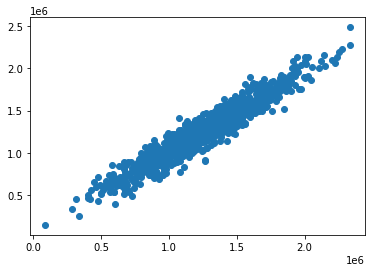

In [8]:
plt.scatter(y_test, predictions)